<a href="https://colab.research.google.com/github/Ignas12345/Magistro_projektas/blob/main/knygutes/keliu_palyginimas/TCGA_koreliaciju_skaiciavimas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Šitoj knygutėj paskaičiuojaam Spearman'o koreliacija tarp mirnr ir genų raiškų

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
#galima imti arba normalizuotus skaiciavimus arba ne (man atrodo)
url_miRNR = 'https://raw.githubusercontent.com/Ignas12345/Magistro_projektas/refs/heads/main/duomenys/filtered_isoform_read_per_million_RNA_mapped.csv'
mirna_df = pd.read_csv(url_miRNR, )

#url_genai = 'https://raw.githubusercontent.com/Ignas12345/Magistro_projektas/refs/heads/main/duomenys/filtered_gene_expression_counts.csv'
url_genai = 'https://raw.githubusercontent.com/Ignas12345/Magistro_projektas/refs/heads/main/duomenys/fpkm_normalized_filtered_expression_counts.csv'
gene_df = pd.read_csv(url_genai, )


Pirma išsidėstom mėginius vienoda tvarka

In [ ]:
mirna_ids = mirna_df["Unnamed: 0"].to_numpy()
mirna_df.index = mirna_ids
gene_ids = gene_df["gene_id"].to_numpy()
gene_df.index = gene_ids
gene_names = gene_df["gene_name"].to_numpy()

In [ ]:
columns_to_drop = [
    "source", "type", "gene_id", "gene_name", "gene_type", "score", "phase", "level",
    "hgnc_id", "havana_gene"
]

# Drop the specified columns
gene_df = gene_df.drop(columns=columns_to_drop)
mirna_df = mirna_df.drop(columns=['Unnamed: 0'])

#mirna_df.head()

In [ ]:
gene_df.columns = [
    col[:16] for col in gene_df.columns
]
mirna_df.columns = [
    col[:16] for col in mirna_df.columns
]

#issifiltruojam outilieri, kuri jau isfiltravom atlikdami DE arba ne
'''
mirna_df = mirna_df.drop(columns = 'TCGA-2G-AAGY-05A')
gene_df = gene_df.drop(columns = 'TCGA-2G-AAGY-05A')
'''

"\nmirna_df = mirna_df.drop(columns = 'TCGA-2G-AAGY-05A')\ngene_df = gene_df.drop(columns = 'TCGA-2G-AAGY-05A')\n"

In [ ]:
mirna_df = mirna_df.loc[:, gene_df.columns].copy()
sample_names = gene_df.columns

In [ ]:
(mirna_ids)

array(['hsa-let-7a-1, mature,MIMAT0000062',
       'hsa-let-7a-1, mature,MIMAT0004481',
       'hsa-let-7a-2, mature,MIMAT0000062',
       'hsa-let-7a-2, mature,MIMAT0010195', 'hsa-let-7a-2, precursor',
       'hsa-let-7a-3, mature,MIMAT0000062',
       'hsa-let-7a-3, mature,MIMAT0004481',
       'hsa-let-7b, mature,MIMAT0000063',
       'hsa-let-7b, mature,MIMAT0004482',
       'hsa-let-7c, mature,MIMAT0000064',
       'hsa-let-7c, mature,MIMAT0026472',
       'hsa-let-7d, mature,MIMAT0000065',
       'hsa-let-7d, mature,MIMAT0004484',
       'hsa-let-7e, mature,MIMAT0000066',
       'hsa-let-7e, mature,MIMAT0004485',
       'hsa-let-7f-1, mature,MIMAT0000067',
       'hsa-let-7f-1, mature,MIMAT0004486',
       'hsa-let-7f-2, mature,MIMAT0000067', 'hsa-let-7f-2, precursor',
       'hsa-let-7g, mature,MIMAT0000414',
       'hsa-let-7g, mature,MIMAT0004584',
       'hsa-let-7i, mature,MIMAT0000415',
       'hsa-let-7i, mature,MIMAT0004585',
       'hsa-mir-1-1, mature,MIMAT0000416',
   

Pirma pabandom atlikti spirmano analize kazkokia.

In [ ]:
from scipy.stats import pearsonr, spearmanr


In [ ]:
mirna_name = 'hsa-mir-20a, mature,MIMAT0000075'
write_name = '20-5p'
num_genes = gene_df.shape[0]
num_samples = gene_df.shape[1]

In [ ]:
mirna_expression_array = mirna_df.loc[mirna_name,:].to_numpy()
gene_expression_matrix = gene_df.to_numpy()

correlation_array_pearson = np.zeros(gene_df.shape[0])
pearson_p_values = np.zeros(gene_df.shape[0])
spearman_p_values = np.zeros(gene_df.shape[0])
correlation_array_spearman = np.zeros(gene_df.shape[0])

for i in range(num_genes):
  #correlation_array_pearson[i], pearson_p_values[i] = pearsonr(mirna_expression_array, gene_expression_matrix[i,:])
  correlation_array_spearman[i], spearman_p_values[i] = spearmanr(mirna_expression_array, gene_expression_matrix[i,:])


In [ ]:
#sorted_pearson_indices = np.argsort(correlation_array_pearson)
sorted_spearman_indices = np.argsort(correlation_array_spearman)

sorted_spearman_df = pd.DataFrame(columns=['gene_id','gene_name', 'spearman_correlation', 'p-value'])
sorted_spearman_df['gene_id'] = gene_ids[sorted_spearman_indices]
sorted_spearman_df['gene_name'] = gene_names[sorted_spearman_indices]
sorted_spearman_df['spearman_correlation'] = correlation_array_spearman[sorted_spearman_indices]
sorted_spearman_df['p-value'] = spearman_p_values[sorted_spearman_indices]

sorted_spearman_df.to_csv('spearman_correlations_'+write_name+'.csv', index=False)
sorted_spearman_df

,gene_id,gene_name,spearman_correlation,p-value
0,ENSG00000132481.7,TRIM47,-0.689580,6.198100e-21
1,ENSG00000182326.15,C1S,-0.673069,1.127227e-19
2,ENSG00000143196.5,DPT,-0.669292,2.132370e-19
3,ENSG00000159403.18,C1R,-0.654073,2.538086e-18
4,ENSG00000166979.13,EVA1C,-0.651204,3.984783e-18
...,...,...,...,...
17089,ENSG00000104413.18,ESRP1,0.495554,5.563215e-10
17090,ENSG00000156261.13,CCT8,0.495831,5.423298e-10
17091,ENSG00000112081.17,SRSF3,0.495943,5.367845e-10
17092,ENSG00000197275.14,RAD54B,0.514304,9.415718e-11


In [ ]:
i = 4002
#print(f"Pearson correlation: {correlation_array_pearson[sorted_pearson_indices[i]]}, p-value: {pearson_p_values[sorted_pearson_indices[i]]}, gene: {gene_names[sorted_pearson_indices[i]]}")
print(f"Spearman correlation: {correlation_array_spearman[sorted_spearman_indices[i]]}, p-value: {spearman_p_values[sorted_spearman_indices[i]]}, gene: {gene_names[sorted_spearman_indices[i]]}")

Spearman correlation: -0.2087897233900532, p-value: 0.013639726162791906, gene: TAOK3


Dabar pasirenkam, kurio miRNR koreliacijas skaiciuosim ir ismetam outlierius kiekvienam koreliacijos skaiciavimui atskirai. Todėl kiekvienam genui parenkam atskirą outlierių sąrašą (nežinau, ar čia gerai, ar ne...)

In [ ]:
sample_numbers = np.arange(num_samples)
benign_samples = sample_numbers[0:6]
malignant_samples = sample_numbers[6:num_samples]

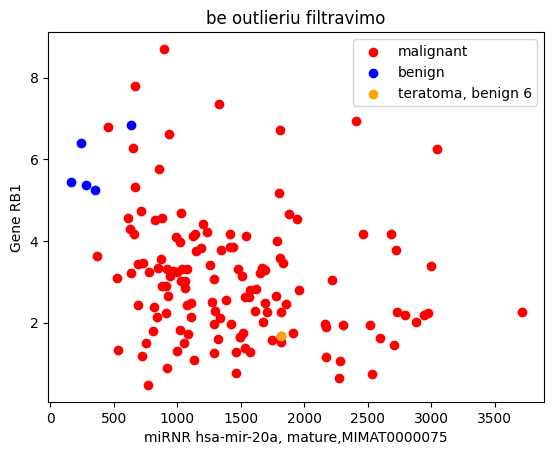

In [ ]:
#mirna_name_2 = 'hsa-mir-371a, mature,MIMAT0000723'
#mirna_name = 'hsa-mir-373, mature,MIMAT0000726'
gene_name ='RB1'
gene_id = gene_ids[np.where(gene_names == gene_name)[0]][0]

x_data = mirna_df.iloc[np.where(mirna_df.index == mirna_name)].to_numpy()[0,:]
#y_data = mirna_df.iloc[np.where(mirna_df.index == mirna_name_2)].to_numpy()[0,:]
y_data = gene_df.iloc[np.where(gene_names == gene_name)].to_numpy()[0,:]

fig1 = plt.figure()
plt.scatter(x_data[malignant_samples], y_data[malignant_samples], c = 'r', label = 'malignant')
plt.scatter(x_data[benign_samples], y_data[benign_samples], c = 'b', label = 'benign')
plt.scatter(x_data[3], y_data[3], c = 'orange', label = 'teratoma, benign 6')
#y_lim = plt.ylim(-1,10)
#x_lim = plt.xlim(-100,7000)
plt.title('be outlieriu filtravimo')
plt.legend()
plt.xlabel('miRNR ' + mirna_name)
plt.ylabel('Gene ' + gene_name)
plt.show()



In [ ]:
#gene_df.columns
#mirna_df.loc['hsa-mir-143, mature,MIMAT0000435'].head(n =10)